# Basic Steganography Image
การซ่อนข้อความในรูปภาพแบบพื้นฐาน

![Digital Steganography](https://blog.switchfast.com/hs-fs/hubfs/Threats%20Hiding%20in%20Plain%20Sight%20Digital%20Steganography%20on%20the%20Rise.png?width=600&name=Threats%20Hiding%20in%20Plain%20Sight%20Digital%20Steganography%20on%20the%20Rise.png)

## Read image from url

<class 'PIL.JpegImagePlugin.JpegImageFile'>


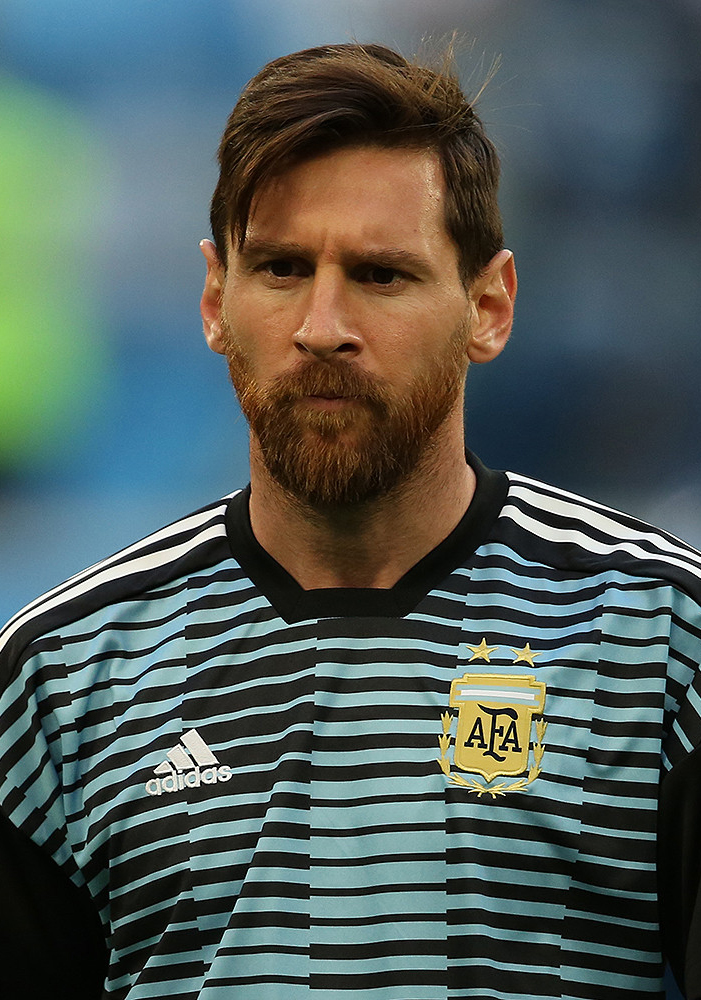

In [0]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

#messi
img_url = 'https://upload.wikimedia.org/wikipedia/commons/c/c1/Lionel_Messi_20180626.jpg'
#ronaldo
#img_url = 'https://cdn.cnn.com/cnnnext/dam/assets/190722151514-01-cristiano-ronaldo-0722-super-tease.jpg'

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

print(type(img))
img

## Convert PIL to numpy format

เปลี่ยนรูปแบบ (format) ของรูปภาพจาก PIL เป็น numpy

type <class 'numpy.ndarray'>
shape (1000, 701, 3)


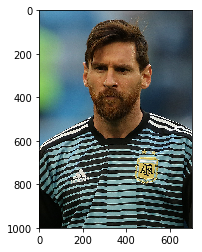

In [0]:
import numpy as np

img_numpy = np.array(img)
print('type', type(img_numpy))
print('shape', img_numpy.shape)

plt.imshow(img_numpy)
plt.show()

## Copy numpy
คัดลอกข้อมูลด้วย numpy

In [0]:
stegano_image =  np.copy(img_numpy)

## Encrypt text into image
เข้ารหัสข้อความ (text) ไปในรูปภาพ (image)

In [0]:
hidden_str = 'This is Lionel Messi'
print(len(hidden_str))

20


### แสดงค่าพิกเซลของรูปภาพ

In [0]:
# แสดงค่าพิกเซลในตำแหน่ง (0,0)
print(stegano_image[0,0])
print(stegano_image[0,0,0])
print(stegano_image[0,0,1])
print(stegano_image[0,0,2])

[ 99 149 174]
99
149
174


In [0]:
# แสดงค่าพิกเซลในตำแหน่ง (1,2)
print(stegano_image[1,2])
print(stegano_image[1,2,0])
print(stegano_image[1,2,1])
print(stegano_image[1,2,2])

[ 93 143 170]
93
143
170


### ตัวอย่างการแสดงค่าพิกเซลของ Dimension ที่ 2

In [0]:
dim = 2
#for row in range(0, img_numpy.shape[0]):
#  for col in range(0, img_numpy.shape[1]):
for row in range(0, 10):
  for col in range(0, 5):
    print(stegano_image[row, col, dim], end=' ')
  print()

174 170 171 173 177 
173 173 170 171 175 
173 173 169 169 173 
173 171 169 169 171 
170 169 169 170 171 
166 169 169 171 172 
166 169 169 170 171 
169 169 169 168 169 
167 171 172 172 172 
168 169 169 169 171 


### การแทรกข้อความเข้าไปในแต่ละพิกเซล

In [0]:
dim = 0
cnt = 0

for row in range(0, stegano_image.shape[0]):
  for col in range(0, stegano_image.shape[1]):
    if cnt < len(hidden_str):
      print(hidden_str[cnt], '=', ord(hidden_str[cnt]))
      stegano_image[row, col, dim] = ord(hidden_str[cnt])
      cnt += 1

T = 84
h = 104
i = 105
s = 115
  = 32
i = 105
s = 115
  = 32
L = 76
i = 105
o = 111
n = 110
e = 101
l = 108
  = 32
M = 77
e = 101
s = 115
s = 115
i = 105


### แสดงรูปภาพหลังจากการซ่อนข้อความเข้าไปในรูปภาพ

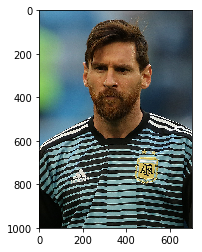

In [0]:
plt.imshow(stegano_image)
plt.show()

## Decrypt text from image
การถอดรหัสข้อความออกจากรูปภาพ

In [0]:
# จะต้องทราบขนาดของข้อความ
hidden_str_len = 20
dim = 0
cnt = 0

for row in range(0, stegano_image.shape[0]):
  for col in range(0, stegano_image.shape[1]):
    if cnt < hidden_str_len:
      print(chr(stegano_image[row, col, dim]), end='')
      cnt += 1

This is Lionel Messi

## การเข้ารหัส Symmetric - Symmetric Encryption

### Fernet (symmetric encryption)

https://cryptography.io/en/latest/fernet/

ยกตัวอย่างการเข้ารหัสแบบ symmetric encryption ด้วย ไลบรารี่ **`Fernet`**

### ติดตั้ง Fernet

In [0]:
!pip install cryptography

     |████████████████████████████████| 2.3MB 4.8MB/s 
     |████████████████████████████████| 102kB 28.5MB/s 


### ตัวอย่างการใช้งานการเข้าและถอดรหัส

In [0]:
from cryptography.fernet import Fernet

def encrypt(message: bytes, key: bytes):
    return Fernet(key).encrypt(message)

def decrypt(token: bytes, key: bytes):
    return Fernet(key).decrypt(token)

key = Fernet.generate_key()  # store in a secure location

message = 'This is secret string'
#encryption
enstr = encrypt(message.encode(), key)
#decryption
destr = decrypt(enstr, key).decode()

### แสดงข้อความและข้อความหลังการเข้ารหัส

In [0]:
print('input:',  message)
print('encryption:', enstr)
print('decryption:', destr)

input: This is secret string
encryption: b'gAAAAABdYrDrq8OnkuyNtWmOl3T7E1LaVYaTyNGd3pqcve1bXF2hIHJXH8mRYPcaRXCJaJegUHIcAEcVcRu_LasQfvDYwpAPAvwiMe9gRWUehK_AZdeiIEI='
decryption: This is secret string


### แสดงข้อมูลของ key ที่ใช้ในการเข้าและถอดรหัส

In [0]:
print(type(key))
print(len(key))
print(key)

<class 'bytes'>
44
b'arDsVZpzEhk7h052ZcJYd5XkYlvbh1yVPmIuOEHLesc='


### แสดงประเภท ขนาด และข้อความที่ได้จากการเข้ารหัส

In [0]:
print(type(enstr))
print(len(enstr))
print(enstr)

<class 'bytes'>
120
b'gAAAAABdYqbiNWIJEShEdQ7f7WPN7KBFsrrMklDrpOCK114lp9wsOVrR7ZKL8R85PG8mkEEOMemikApbq-mM0-mSbR5OW0pC91sdoSv8R_rygreb_qdiE6w='


### แสดงข้อความที่เข้ารหัส

In [0]:
print(enstr[0])
print(enstr[1])
print(enstr[2])
print(enstr[3])

103
65
65
65


In [0]:
for en in enstr:
  print(chr(en), '=', en)

g = 103
A = 65
A = 65
A = 65
A = 65
A = 65
B = 66
d = 100
Y = 89
r = 114
D = 68
r = 114
q = 113
8 = 56
O = 79
n = 110
k = 107
u = 117
y = 121
N = 78
t = 116
W = 87
m = 109
O = 79
l = 108
3 = 51
T = 84
7 = 55
E = 69
1 = 49
L = 76
a = 97
V = 86
Y = 89
a = 97
T = 84
y = 121
N = 78
G = 71
d = 100
3 = 51
p = 112
q = 113
c = 99
v = 118
e = 101
1 = 49
b = 98
X = 88
F = 70
2 = 50
h = 104
I = 73
H = 72
J = 74
X = 88
H = 72
8 = 56
m = 109
R = 82
Y = 89
P = 80
c = 99
a = 97
R = 82
X = 88
C = 67
J = 74
a = 97
J = 74
e = 101
g = 103
U = 85
H = 72
I = 73
c = 99
A = 65
E = 69
c = 99
V = 86
c = 99
R = 82
u = 117
_ = 95
L = 76
a = 97
s = 115
Q = 81
f = 102
v = 118
D = 68
Y = 89
w = 119
p = 112
A = 65
P = 80
A = 65
v = 118
w = 119
i = 105
M = 77
e = 101
9 = 57
g = 103
R = 82
W = 87
U = 85
e = 101
h = 104
K = 75
_ = 95
A = 65
Z = 90
d = 100
e = 101
i = 105
I = 73
E = 69
I = 73
= = 61


## Encrypt cryptography to image
การซ่อนข้อความที่เข้ารหัส (Encrypt cryptography) ไปยังรูปภาพ

### การเข้ารหัสข้อความ 
ข้อความที่ใช้ในการเข้ารหัสคือ **'This is Lionel Messi'**

In [0]:
key = Fernet.generate_key()  # store in a secure location

message = 'This is Lionel Messi'
#encryption
enstr = encrypt(message.encode(), key)
#decryption
destr = decrypt(enstr, key).decode()

print('input:',  message)
print('encryption:', enstr)
print('decryption:', destr)

input: This is Lionel Messi
encryption: b'gAAAAABdYrN_86IDrGgppIr5OFaeD3IhjmgxMtUVaK7zvdE9pycesYnolkkxdaW8r4ZrVXy2fT8TPxCEVJ25PWAL5zo4UOmmufIPhFQ2k8c_tLYzG5crLFM='
decryption: This is Lionel Messi


### แสดงประเภท ขนาดและ ข้อความที่เข้ารัหส

In [0]:
print(type(enstr))
print(len(enstr))
print(enstr)

<class 'bytes'>
120
b'gAAAAABdYrN_86IDrGgppIr5OFaeD3IhjmgxMtUVaK7zvdE9pycesYnolkkxdaW8r4ZrVXy2fT8TPxCEVJ25PWAL5zo4UOmmufIPhFQ2k8c_tLYzG5crLFM='


### คัดลอกรูปภาพที่ใช้ในการทดสอบ

In [0]:
crypto_stegano_image =  np.copy(img_numpy)

### ซ่อนข้อความ cryptography ไปในรูปภาพ

In [0]:
dim = 0
cnt = 0

for row in range(0, crypto_stegano_image.shape[0]):
  for col in range(0, crypto_stegano_image.shape[1]):
    if cnt < len(enstr):
      #print(chr(enstr[cnt]), '=', enstr[cnt])
      crypto_stegano_image[row, col, dim] = enstr[cnt]
      cnt += 1

### แสดงรูปภาพที่ถูกซ่อนข้อความ

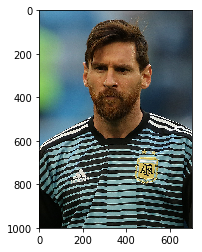

In [0]:
plt.imshow(crypto_stegano_image)
plt.show()

## Decrypt cryptography from image
การถอดรหัสข้อความจากรูปภาพ โดยข้อความที่ได้จะเป็นข้อความที่ถูกเข้ารหัสด้วยวิธี symmetric encryption

In [0]:
enstr_len = 120
dim = 0
cnt = 0
cryptography_text = ''

for row in range(0, crypto_stegano_image.shape[0]):
  for col in range(0, crypto_stegano_image.shape[1]):
    if cnt < enstr_len:
      #print(chr(crypto_stegano_image[row, col, dim]), end='')
      cryptography_text = cryptography_text + chr(crypto_stegano_image[row, col, dim])
      cnt += 1
      
print(type(cryptography_text))
print(cryptography_text)

cryptography_text = bytes(cryptography_text, 'utf-8')
print(type(cryptography_text))
print(cryptography_text)

<class 'str'>
gAAAAABdYrN_86IDrGgppIr5OFaeD3IhjmgxMtUVaK7zvdE9pycesYnolkkxdaW8r4ZrVXy2fT8TPxCEVJ25PWAL5zo4UOmmufIPhFQ2k8c_tLYzG5crLFM=
<class 'bytes'>
b'gAAAAABdYrN_86IDrGgppIr5OFaeD3IhjmgxMtUVaK7zvdE9pycesYnolkkxdaW8r4ZrVXy2fT8TPxCEVJ25PWAL5zo4UOmmufIPhFQ2k8c_tLYzG5crLFM='


### Decrypt cryptography code to text 
ถอดรหัสข้อความ cryptography ไปเป็นข้อความทั่วไป

ข้อความที่ถอดได้คือ **This is Lionel Messi**

In [0]:
#decryption
destr = decrypt(cryptography_text, key).decode()

print('decryption:', destr)

decryption: This is Lionel Messi
